In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [5]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
44,50,F,NORMAL,NORMAL,12.295,drugX
112,35,M,LOW,NORMAL,9.170,drugX
42,50,M,NORMAL,NORMAL,15.790,drugY
195,56,F,LOW,HIGH,11.567,drugC
4,61,F,LOW,HIGH,18.043,drugY
151,68,M,HIGH,HIGH,11.009,drugB
1,47,M,LOW,HIGH,13.093,drugC
140,49,M,HIGH,NORMAL,6.269,drugA
114,20,F,NORMAL,NORMAL,9.281,drugX
2,47,M,LOW,HIGH,10.114,drugC


In [6]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'].values)
df['BP'] = labelencoder.fit_transform(df['BP'].values)
df['Cholesterol'] = labelencoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
5,22,0,2,0,8.607,drugX
90,62,1,2,0,16.594,drugY
77,26,0,0,1,19.161,drugY
36,32,1,0,1,9.445,drugA
111,47,0,2,1,6.683,drugX
70,70,1,0,0,13.967,drugB
113,65,0,1,1,13.769,drugX
185,57,0,2,1,25.893,drugY
190,58,1,0,0,18.991,drugY
78,19,0,0,0,13.313,drugA


In [7]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [8]:
y = df['Drug'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [10]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_predict = tree_model.predict(X_test)

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [39]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


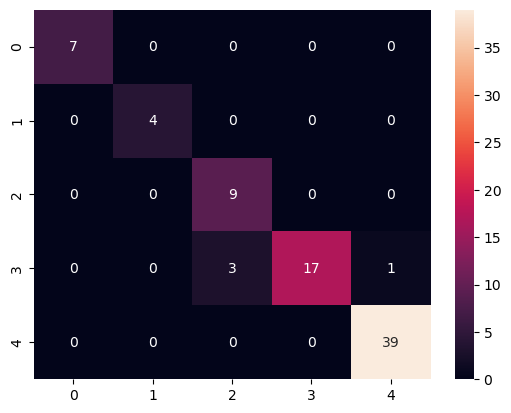

In [23]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

predict = cross_val_predict(estimator=tree_model, X=X, y=y, cv=5)
print(f"Classification report: " , classification_report(y, predict))

DecisionTree chizish

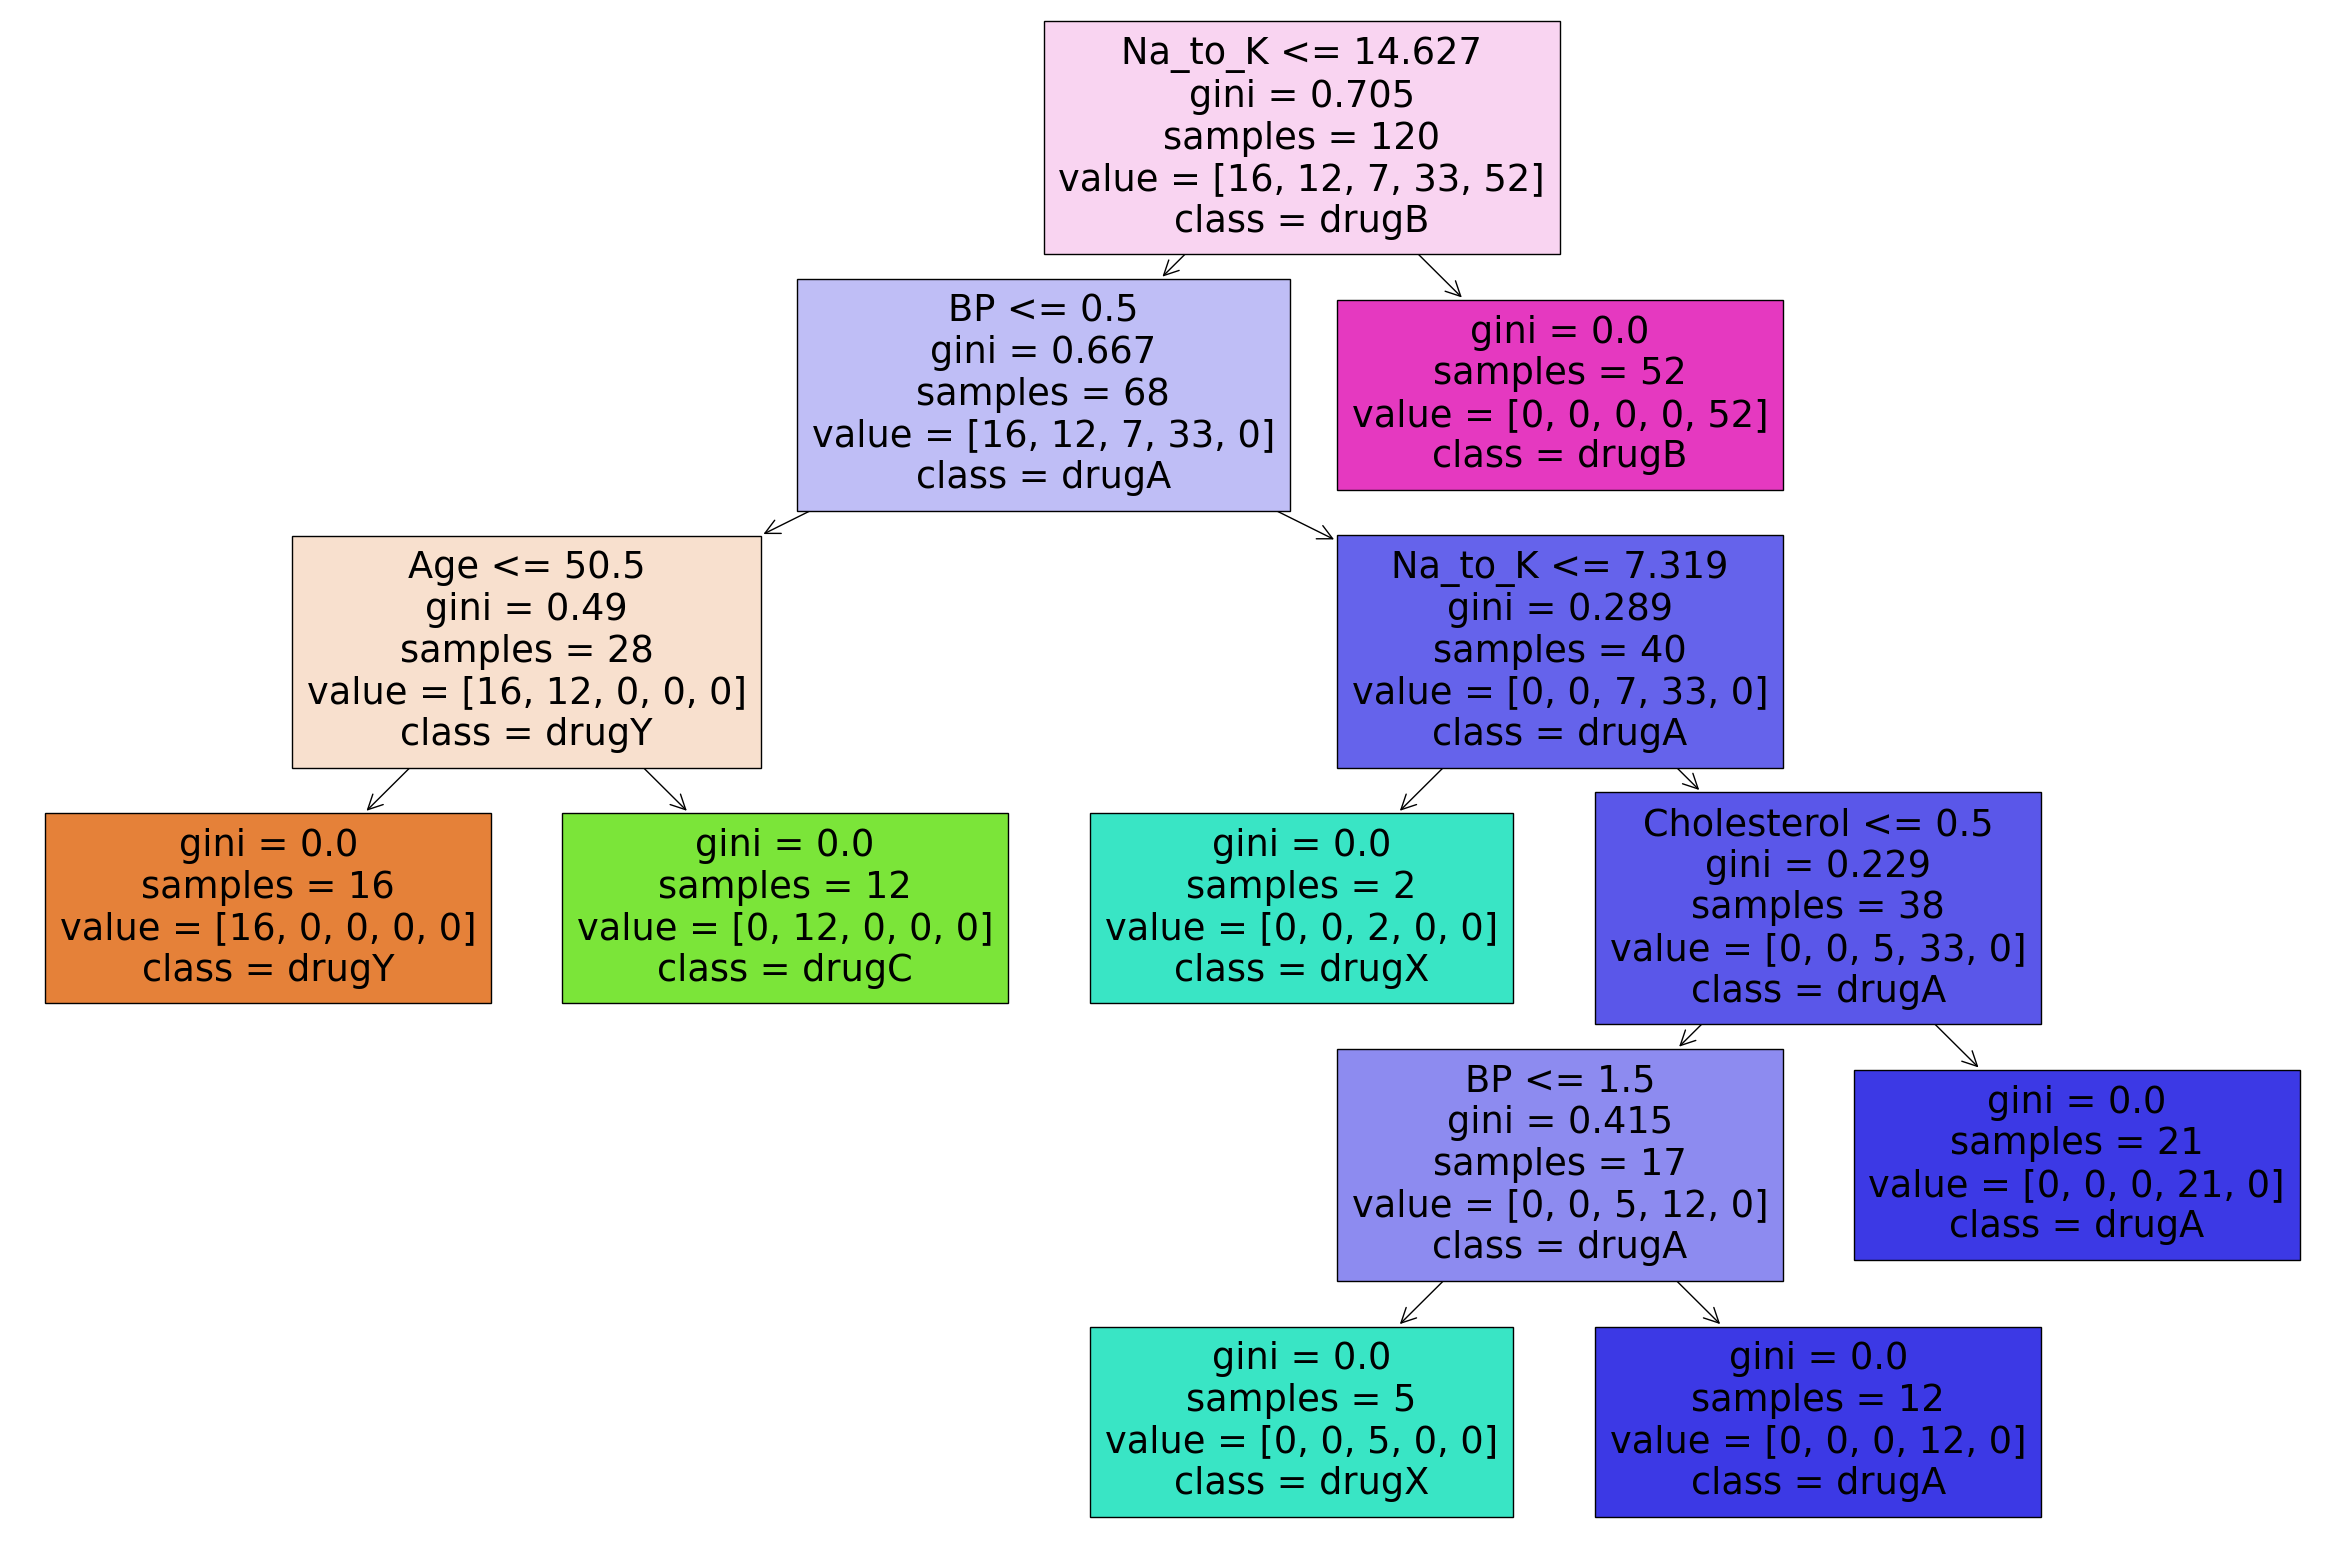

In [31]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTree's Accuracy:  0.875


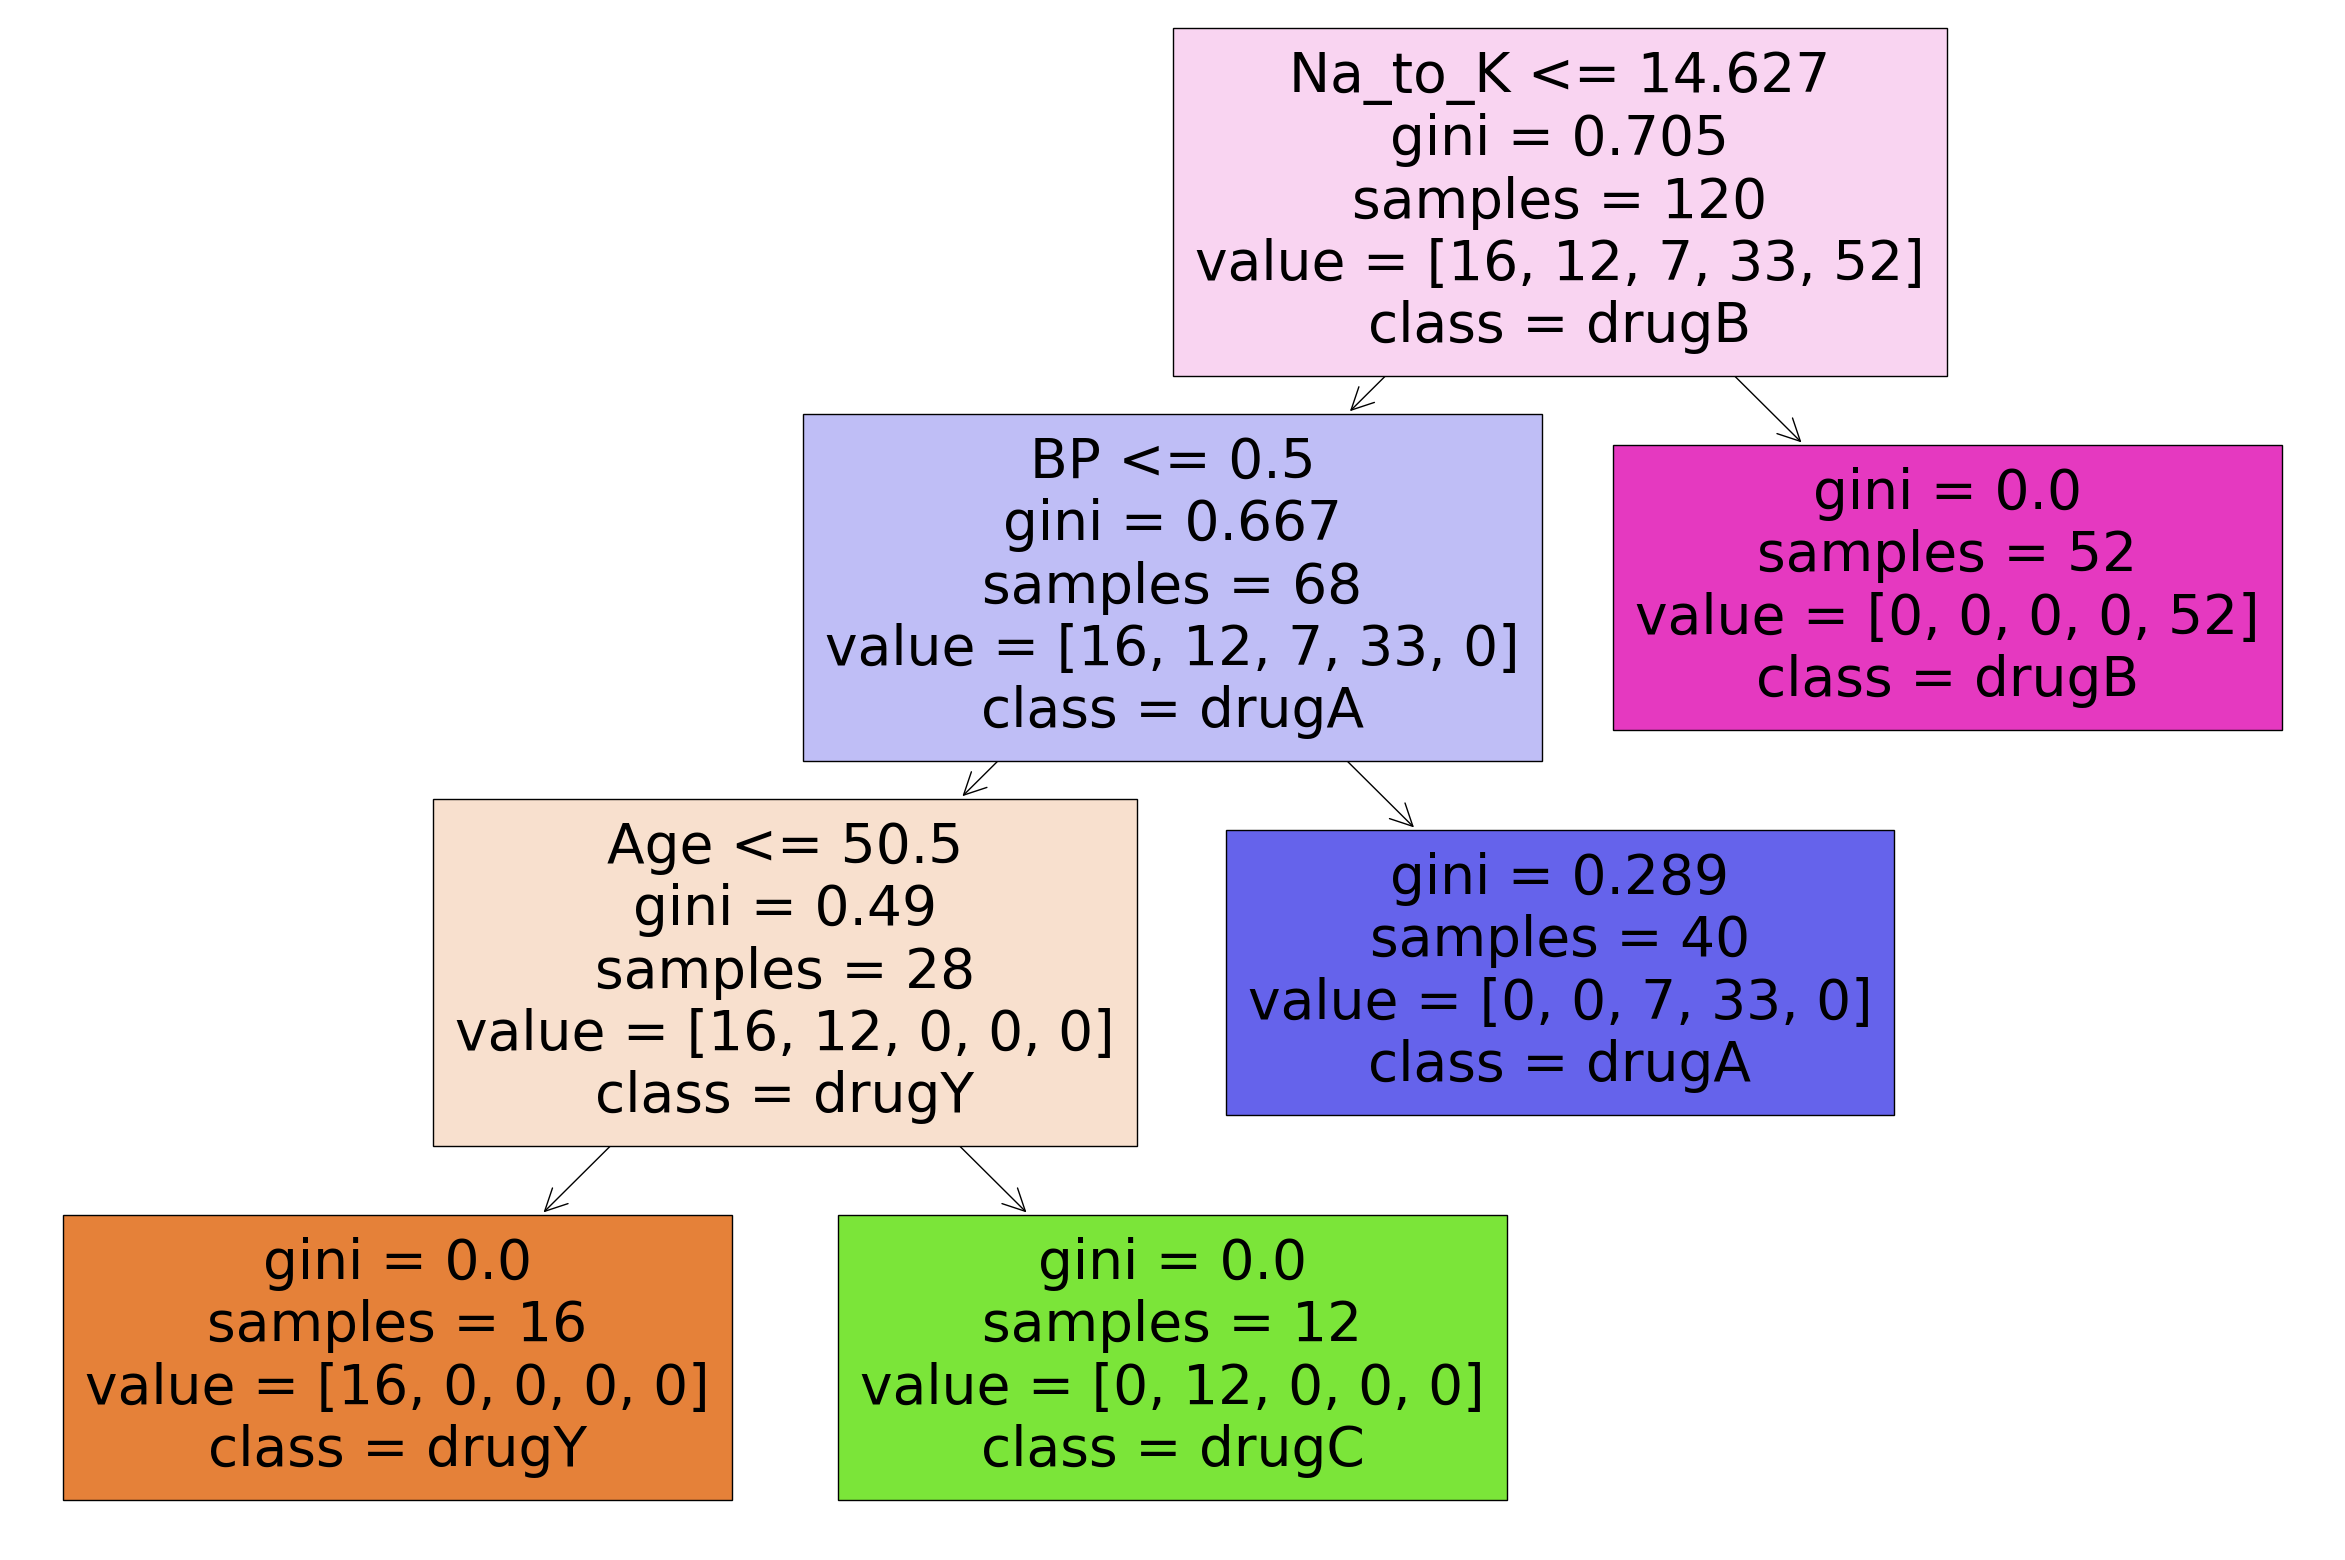

In [42]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.1)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTree's Accuracy:  0.8375


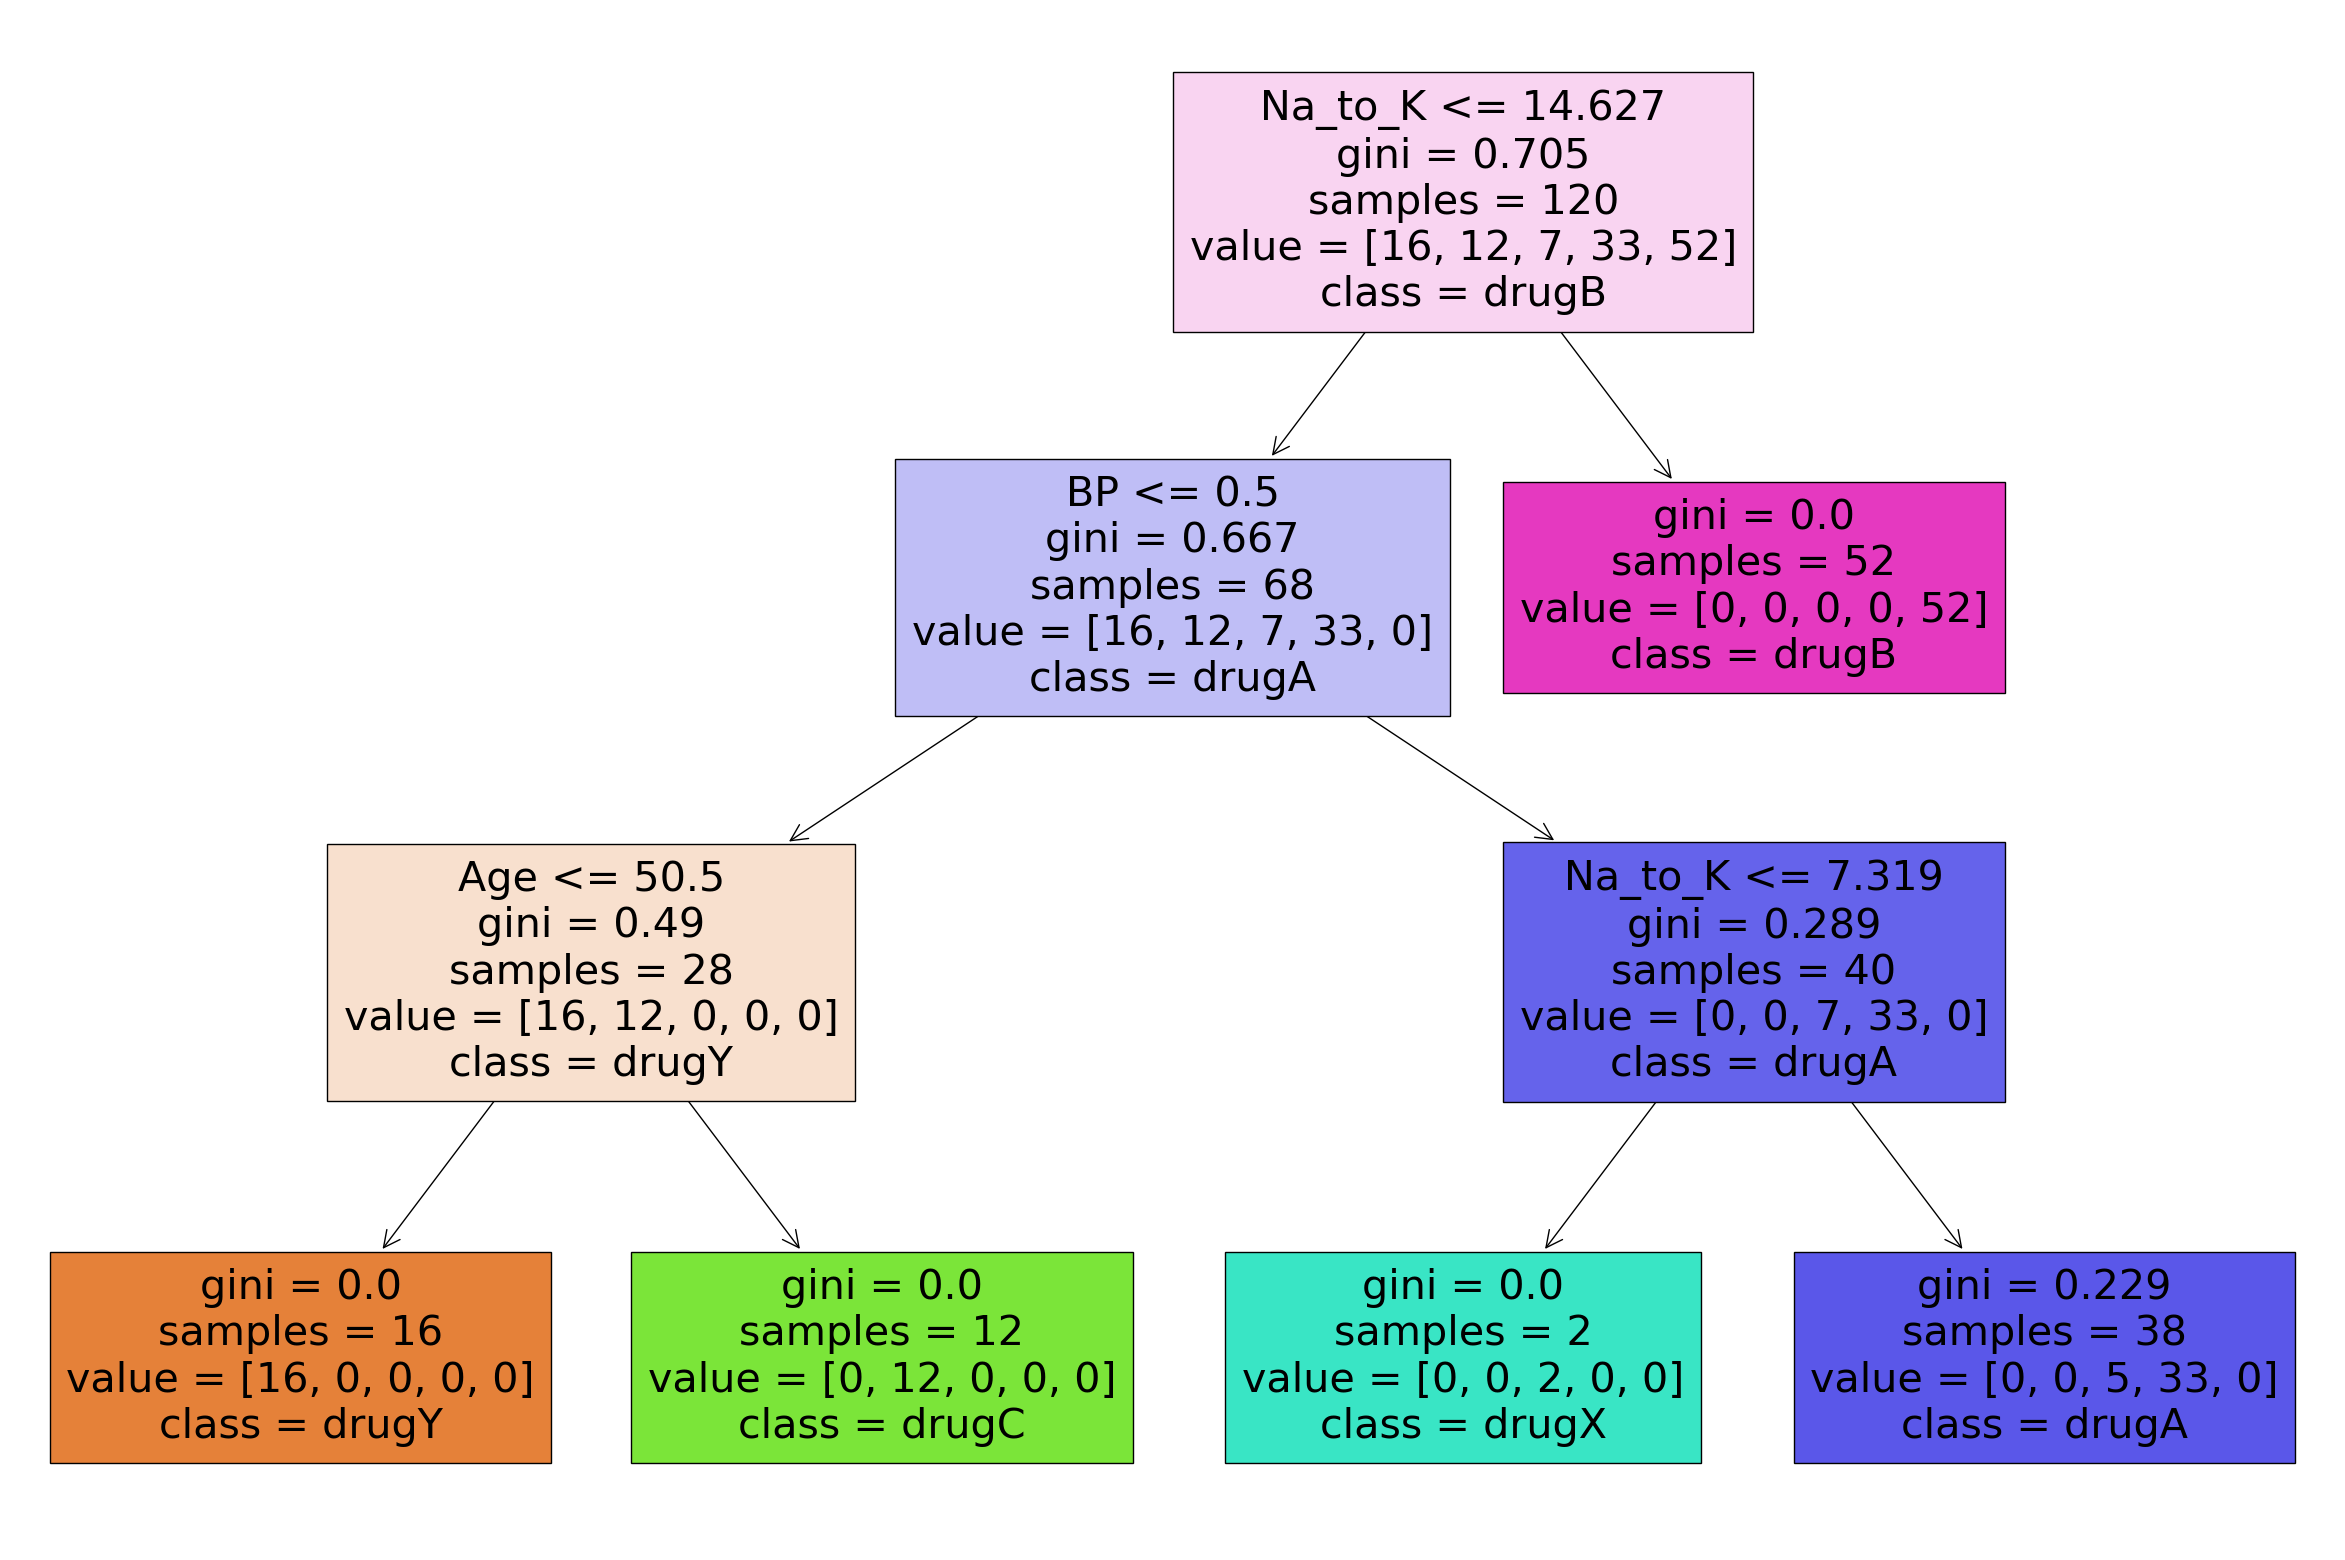

In [44]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTree's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.875


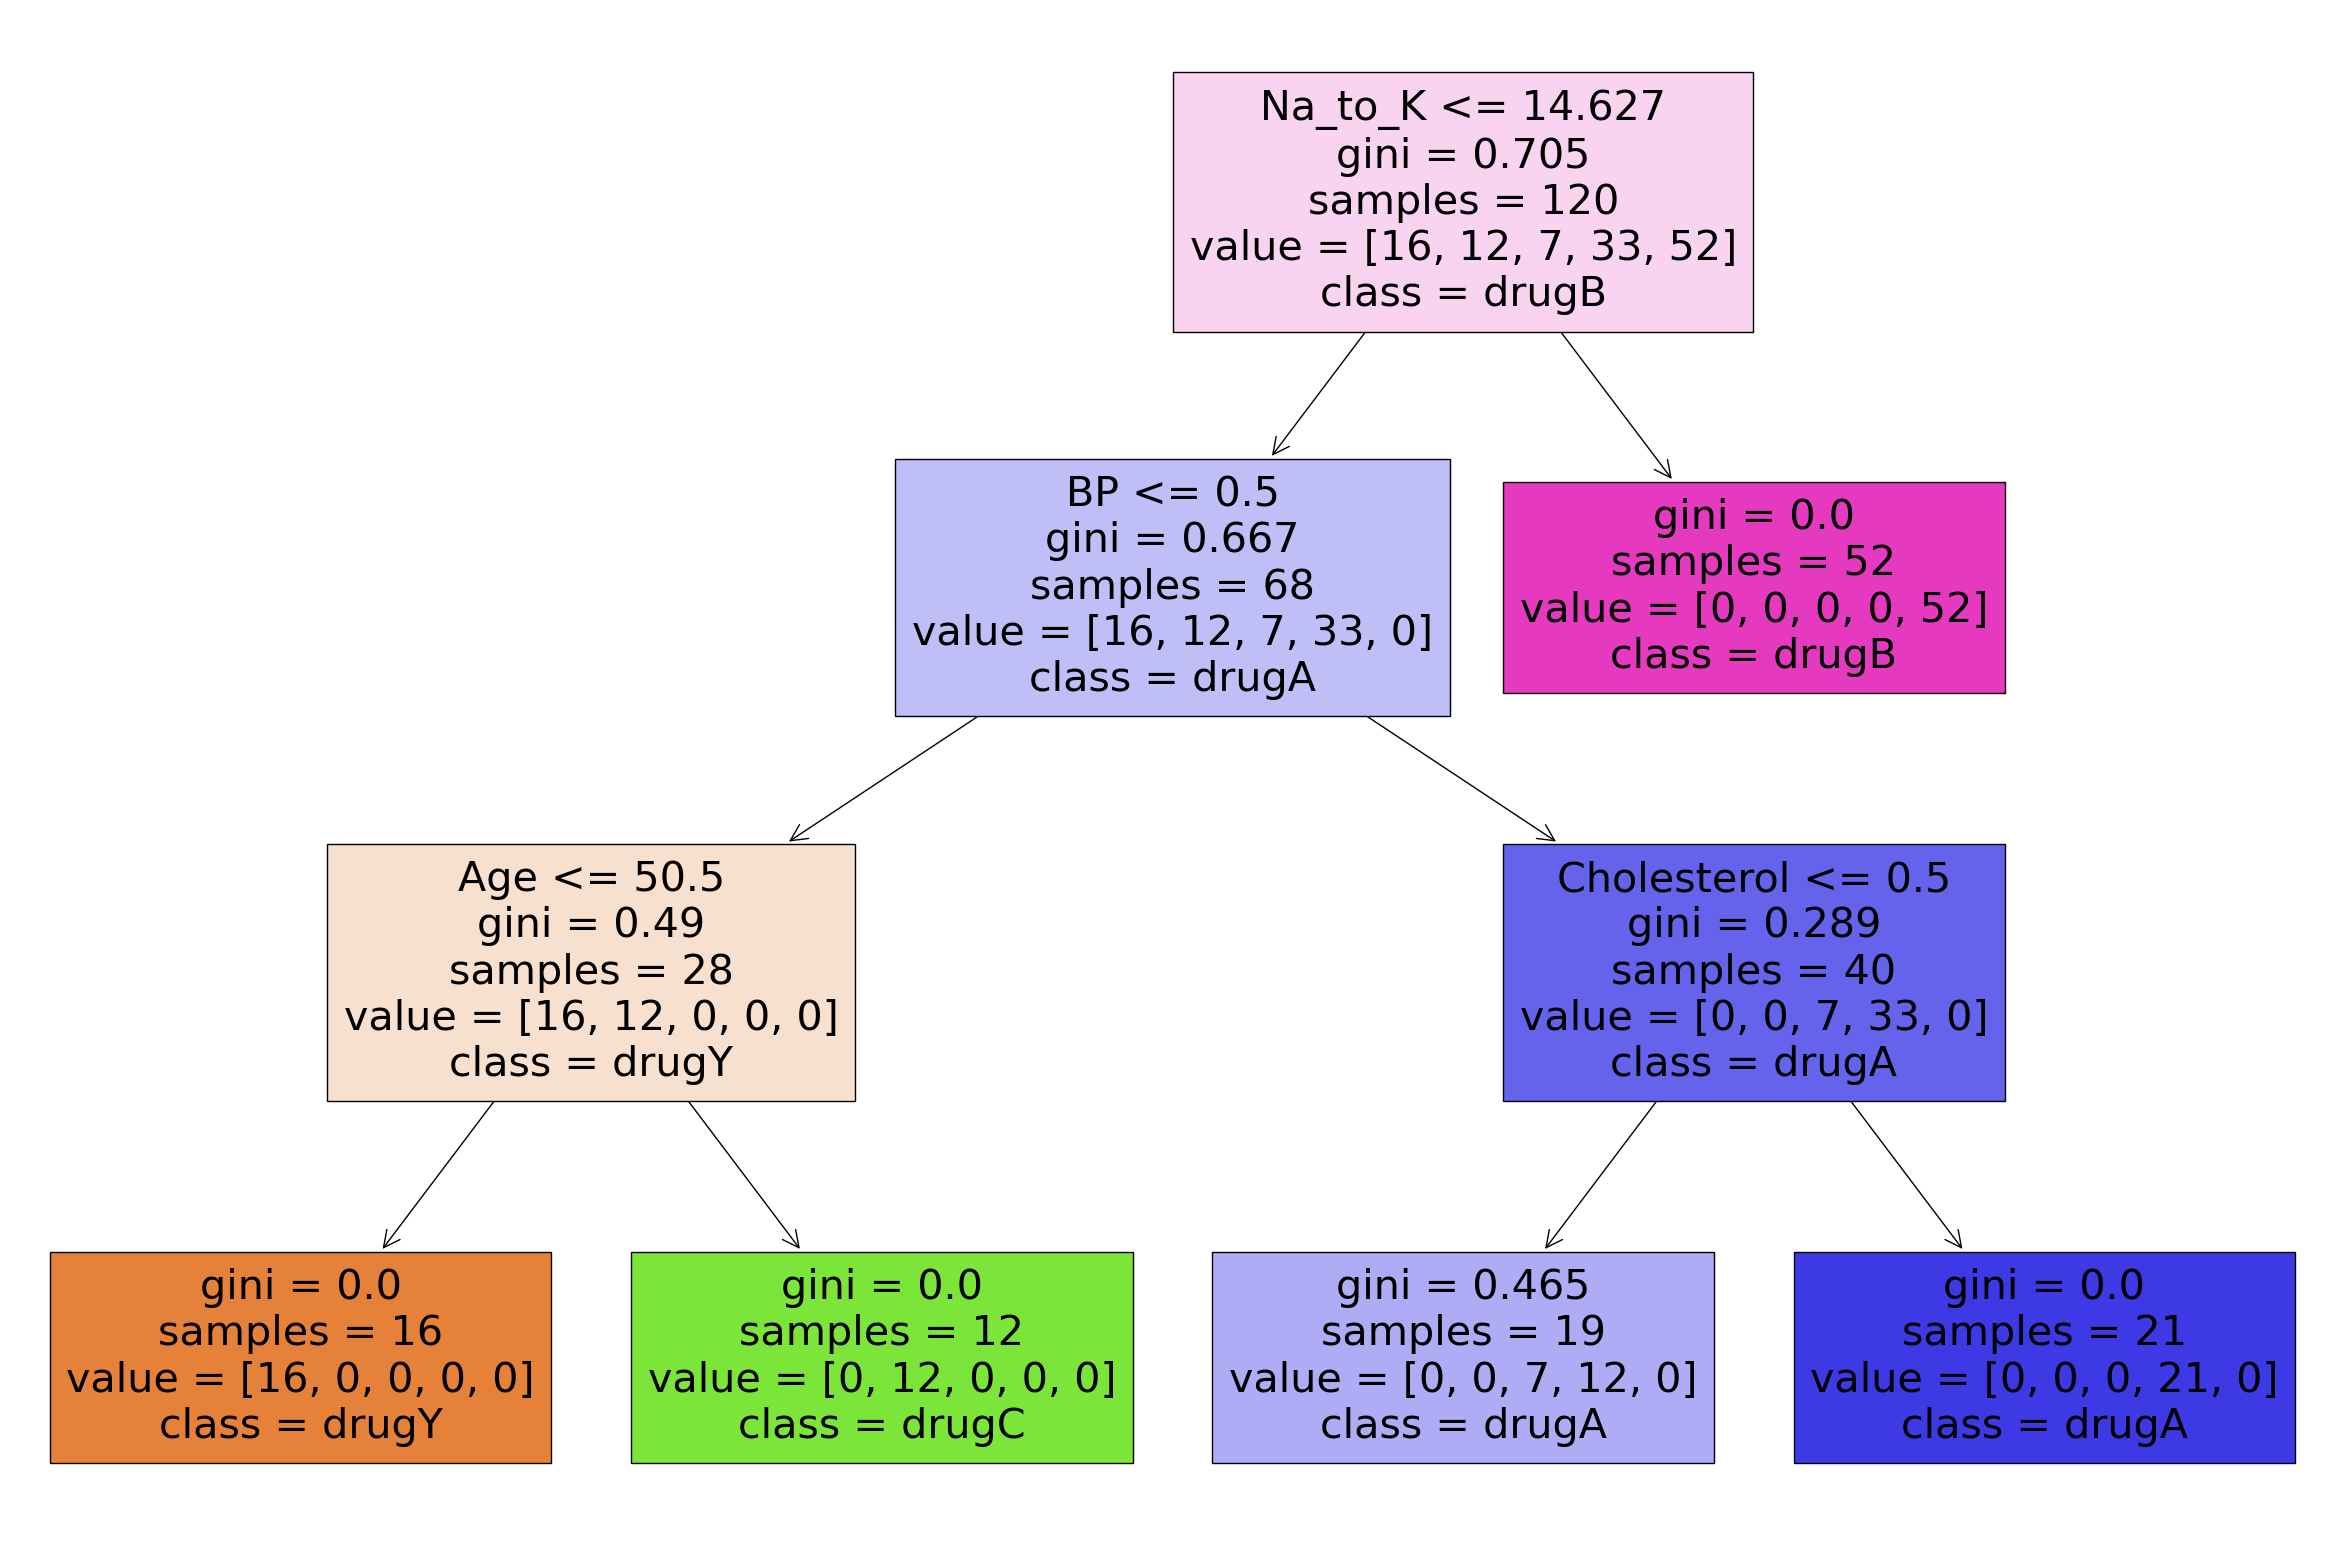

In [53]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [57]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [58]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.9875
